In [1]:
! pip install psycopg2-binary

In [2]:
! pip install snowflake-connector-python

In [15]:
import os
import pymysql
import pandas as pd
conn = pymysql.connect(
 host="localhost",
 port=int(3306),
 db="ecommercestore",
 user="root",
 password="Nw!fmSQL63")

In [16]:
df=pd.read_sql_query("SELECT * FROM customers", conn)
df

C:\Users\91636\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,customer_id,first_name,last_name,birth_date,phone,email,street_address,city,state,points
0,1,Leanor,Syde,1978-11-16,862-639-0489,lsyde0@oakley.com,9396 Comanche Trail,Newark,NJ,3238.0
1,2,Conrado,Pinke,2001-08-16,512-440-3848,cpinke1@discovery.com,739 Pond Drive,Austin,TX,6860.0
2,3,Filmore,Linnit,1954-07-25,203-421-2312,flinnit2@nbcnews.com,3 Jenna Avenue,New Haven,CT,1506.0
3,4,Fee,Conneau,1994-10-04,480-382-3487,fconneau3@tinypic.com,67045 Pennsylvania Drive,Gilbert,AZ,2879.0
4,5,Molli,Butrimovich,1963-04-08,785-112-3346,mbutrimovich4@imdb.com,017 Norway Maple Pass,Topeka,KS,7665.0
...,...,...,...,...,...,...,...,...,...,...
95,96,Dyane,Cheevers,1997-03-25,225-231-2275,dcheevers2n@i2i.jp,639 Lerdahl Center,Baton Rouge,LA,4617.0
96,97,Pavla,Shilvock,1989-10-03,636-992-6416,pshilvock2o@deviantart.com,16180 Warner Point,Saint Louis,MO,3852.0
97,98,Huberto,Cristofvao,1991-06-17,202-688-6844,hcristofvao2p@mayoclinic.com,02 Dennis Plaza,Washington,DC,2039.0
98,99,Jaclyn,Donnan,2000-12-23,217-531-3693,None,5 Randy Center,Springfield,IL,2701.0


In [17]:
df=pd.read_sql_query("select customer_id, sum(total) as total_amount_per_customer from customers join order_payments_details using(customer_id) join order_items using(order_id) group by customer_id order by total_amount_per_customer desc", conn)
df

C:\Users\91636\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,customer_id,total_amount_per_customer
0,51,352.04
1,79,312.35
2,65,290.70
3,32,242.51
4,55,226.97
5,34,214.72
6,74,205.01
7,60,200.53
8,20,181.89
9,37,178.38


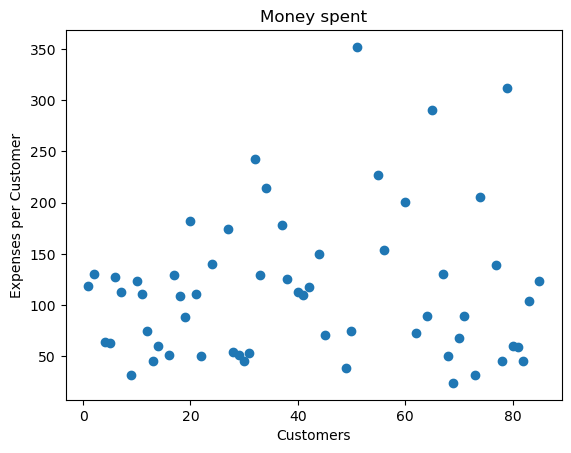

In [7]:
import matplotlib.pyplot as plt 
plt.scatter(df["customer_id"], df["total_amount_per_customer"])
plt.title("Money spent")
plt.xlabel("Customers")
plt.ylabel("Expenses per Customer")
plt.show()

In [18]:
df=pd.read_sql_query("SELECT COUNT(C.customer_id) AS number_of_customers, M.membership_type FROM customers AS C INNER JOIN membership AS M ON C.customer_id = M.customer_id GROUP BY M.membership_type", conn)
df

C:\Users\91636\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,number_of_customers,membership_type
0,37,gold
1,25,None
2,17,silver
3,21,platinum


([<matplotlib.patches.Wedge at 0x1de7b29f7c0>,
 [Text(0.5162922399525259, 1.1930810211233787, 'Gold'),
  Text(-1.0994572174374968, 0.03455180204558492, 'None'),
  Text(-0.3068901790611133, -1.0563230651632283, 'Platinum'),
  Text(0.8691705275003079, -0.6741977411151988, 'Silver')])

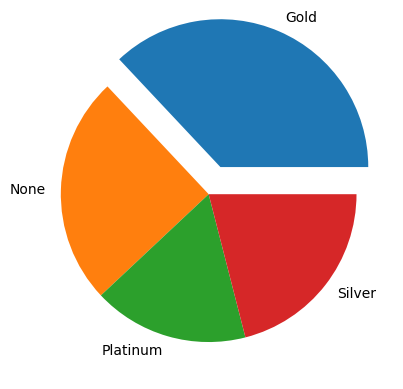

In [9]:
mylabels = ["Gold", "None", "Platinum", "Silver"]
myexplode = [0.2, 0, 0, 0]
plt.pie(df["number_of_customers"], labels=mylabels, explode=myexplode)


In [19]:
df=pd.read_sql_query("SELECT s.shipper_id, COUNT(*) AS number_of_orders FROM shippers s  JOIN orders o USING(shipper_id) GROUP BY s.shipper_id", conn)
df


C:\Users\91636\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,shipper_id,number_of_orders
0,1,12
1,2,9
2,3,4
3,4,5
4,5,7
5,6,4
6,7,6
7,8,6
8,9,8
9,10,4


<function matplotlib.pyplot.show(close=None, block=None)>

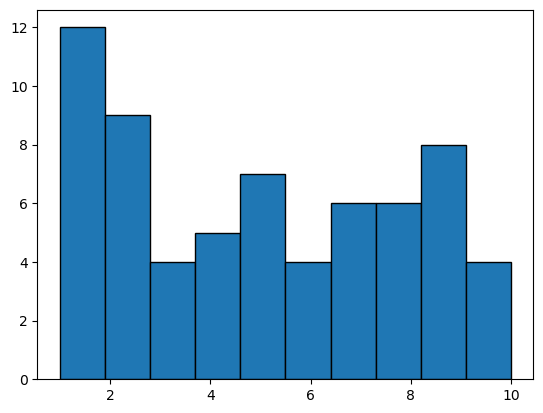

In [20]:
plt.hist(df['shipper_id'], weights=df["number_of_orders"], edgecolor = "black")
plt.show